In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [16]:
from datetime import datetime, date, time, timedelta
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# inspect function to inspect the database a
inspector = inspect(engine)
inspector.get_table_names()

In [23]:
# for loop to loop through the tables 
measurement_col = inspector.get_columns('measurement')

for x in measurement_col:
     print(x["name"], x["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [24]:
# for loop to loop through the tables 
station_col = inspector.get_columns('station')

for y in station_col:
    print(y["name"], y["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculating the latest data point in the database
Latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f'Latest date: {Latest_date}')

# Calculate the date 1 year ago from the last data point in the database
One_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("One year ago: ", One_year_ago)

# Perform a query to retrieve the data and precipitation scores
percp_date = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=One_year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
percep_date_df = pd.DataFrame(percp_date,columns = ["date", "precipitation"])

# Count the values to check for NaN values
percep_date_df.count()

# Drop NaN values.
percep_date_df = percep_date_df.dropna(how='any')

# Sort the dataframe by date  and set index to date
percep_date_df = percep_date_df.sort_values(by="date", ascending = True).set_index("date")

# Checking the clean df with date set as index
percep_date_df


Latest date: ('2017-08-23',)
One year ago:  2016-08-23


,precipitation
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


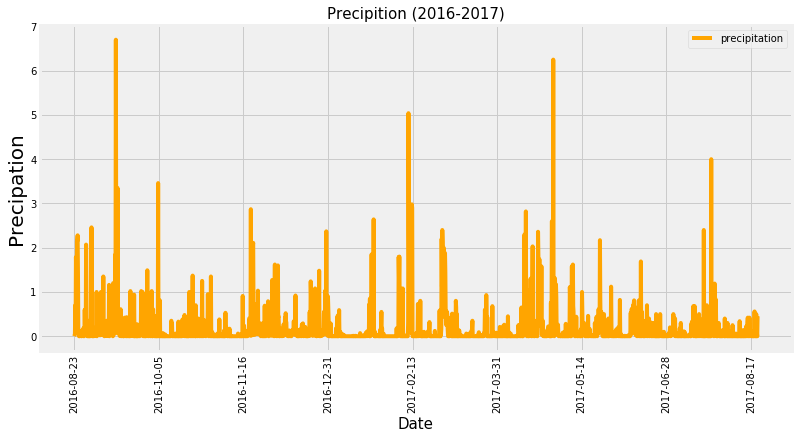

In [26]:
# Use Pandas Plotting with Matplotlib to plot the data
percep_date_df.plot(rot=90, figsize = (12,6), color='orange')
plt.ylabel('Precipation',fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.title("Precipition (2016-2017)",fontsize=15)
plt.show()

In [27]:
# Use Pandas to print the summary statistics for the precipitation data.
percep_date_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [28]:
# Design a query to show how many stations are available in this dataset?
count_stations = session.query(func.count(Station.station)).all()
print(f'Number of stations :{count_stations}')

Number of stations :[(9,)]


In [34]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# query to find the most active station and count it in descending order
active_station = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()

# print the output
print(f'The active station is {active_stations[0]}')

# print the output
active_station

The active station is ('USC00519281', 2772)


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# selecting active station
best_station = active_station[0][0]

# creating a query to find the highest,lowest and average temp and putting in a variable.
temp_query = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == best_station).all()
# print the output
print(f'The temperature and average recorded :{temp_query}')

The temperature and average recorded :[(54.0, 71.66378066378067, 85.0)]


In [57]:
# Choose the station with the highest number of temperature observations.


temp_observation = session.query(Measurement.tobs).\
                    filter(Measurement.station == active_station[0][0]).\
                    filter(Measurement.date >= One_year_ago).all()

temperatures = np.ravel(temp_observation)
temperatures

array([77., 77., 80., 80., 75., 73., 78., 77., 78., 80., 80., 78., 78.,
       78., 73., 74., 80., 79., 77., 80., 76., 79., 75., 79., 78., 79.,
       78., 78., 76., 74., 77., 78., 79., 79., 77., 80., 78., 78., 78.,
       77., 79., 79., 79., 79., 75., 76., 73., 72., 71., 77., 79., 78.,
       79., 77., 79., 77., 78., 78., 78., 78., 77., 74., 75., 76., 73.,
       76., 74., 77., 76., 76., 74., 75., 75., 75., 75., 71., 63., 70.,
       68., 67., 77., 74., 77., 76., 76., 75., 76., 75., 73., 75., 73.,
       75., 74., 75., 74., 75., 73., 75., 73., 73., 74., 70., 72., 70.,
       67., 67., 69., 70., 68., 69., 69., 66., 65., 68., 62., 75., 70.,
       69., 76., 76., 74., 73., 71., 74., 74., 72., 71., 72., 74., 69.,
       67., 72., 70., 64., 63., 63., 62., 70., 70., 62., 62., 63., 65.,
       69., 77., 70., 74., 69., 72., 71., 69., 71., 71., 72., 72., 69.,
       70., 66., 65., 69., 68., 68., 68., 59., 60., 70., 73., 75., 64.,
       59., 59., 62., 68., 70., 73., 79., 75., 65., 70., 74., 70

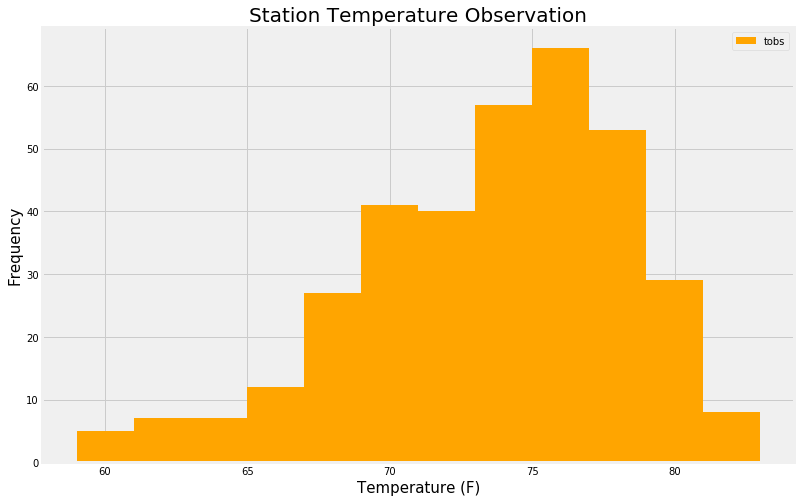

In [76]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

plt.figure(figsize=(12,8))
plt.hist(temperatures, bins=12,color='orange')
plt.xlabel("Temperature (F)",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title("Station Temperature Observation",fontsize=20)
plt.legend(labels=['tobs'])
plt.show()

## Bonus Challenge Assignment

In [77]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
